### Reference

- https://www.instructables.com/id/Export-data-from-google-spreadsheet-in-required-CS/
- https://medium.com/bhavaniravi/python-pandas-tutorial-92018da85a33
- [Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
- [Parsing input CSV dates](https://riptutorial.com/pandas/example/8458/parsing-date-columns-with-read-csv)
- [Convert column of dataFrame](https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format)
- [Data Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)
- [Weighted Average Tutorial](https://pbpython.com/weighted-average.html)

https://stackoverflow.com/questions/37337836/linear-regression-with-pandas-time-series

## To Do:

- ~Add column to weights dataFrame of calculated trend D~
- ~plot trend and weight~
- calculate linear fits and project goal target dates
    - possibly multiple models based on a range?
- make an exportable form & workflow so we can easily upload data and run report

### About

Import Weight Data imported from [QS Access iOS App](https://apps.apple.com/us/app/qs-access/id920297614) as CSV

In [1]:
#setup doc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#print(pd.__version__)

In [2]:
weights = pd.read_csv("Weight.csv")

In [3]:
weights.head();

In [4]:
weights.describe;

In [5]:
# filter out duplicate date columns
cols = ["Start","Weight (lb)"] 
weights = weights[cols] 

# rename columns
weights.columns = ['Date', 'Weight']

# convert date string to datetime object
weights['Date'] = pd.to_datetime(weights['Date'])

weights;

In [6]:
# copy first weight to trend column
weights.at[0,'Trend'] = weights['Weight'].iloc[0]

# Calculate the Trend given the smoothing constant c
c = 0.9
for i, row in weights[1:].iterrows():
        res = (1 - c) * (weights['Weight'][i] - weights['Trend'][i - 1])
        res = round(res,1)
        weights.at[i,'Trend'] = res + weights['Trend'][i - 1]

weights;

In [7]:
# copy put zeros in rate col
weights.at[0,'Lbs_per_day'] = 0

#get daily rates
for i, row in weights[1:].iterrows():
        weights.at[i,'Lbs_per_day'] = weights['Trend'][i] - weights['Trend'][i - 1]

weights;

In [8]:
startDate = pd.to_datetime("January 15, 2020")
endDate = pd.Timestamp.now()
domain = (startDate,endDate)
#weights.plot.line(figsize=(10,6),x = "Date", legend=True, xlim=domain)

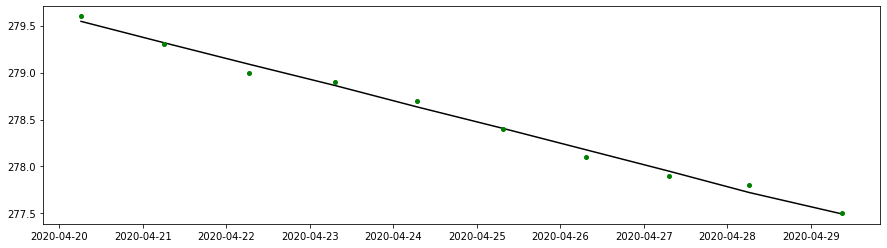

In [20]:
dietStartDate = pd.to_datetime("January 15, 2020") 

# Get subset of all weights based on date range
startDate = pd.to_datetime("April 20, 2020")
today = pd.Timestamp.now()
mask = (weights['Date'] > startDate) & (weights['Date'] <= today)

dietLength = (today - dietStartDate).days

filteredWeights = weights[mask]

y = filteredWeights['Trend'].tolist()
x = range(len(y))
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit)
goal = 225*np.ones(500)

plt.figure(figsize = [15,4])
plt.plot(filteredWeights['Date'], fit_fn(x), 'k-')
plt.plot(filteredWeights['Date'], filteredWeights['Trend'], 'go', ms = 4)

In [19]:
i = dietLength
while fit_fn(i) > 225:
    i += 1
    
fit_fn(i)
#print("Day:",i," Value: ",fit_fn(i))
goalDay = dietStartDate + pd.DateOffset(i)
print("Goal Reached: ",goalDay.month,"/",goalDay.day,"/",goalDay.year, ": ",i-dietLength, "Days from now.")
#print(np.poly1d(fit_fn))

Goal Reached:  9 / 11 / 2020 :  135 Days from now.


In [ ]:
# get date range
# make fit line
# calculate date reached